### Objective:  create a neural network with Keras.

In [39]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(tf.__version__)

1.18.5
1.0.5
3.2.2
2.2.0


### Dataset

In [40]:
from google.colab import files
uploaded = files.upload()

Saving Games-Calculated.csv to Games-Calculated (1).csv


In [81]:
colnames = ['Date','HomeTeam','HomeScore','AwayTeam','AwayScore','HomeScoreAverage',
            'HomeDefenseAverage', 'AwayScoreAverage', 'AwayDefenseAverage', 'Result']

df = pd.read_csv("Games-Calculated.csv", header=None, names=colnames)
df.head()

,Date,HomeTeam,HomeScore,AwayTeam,AwayScore,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
0,2015-11-13,Hawaii,87,Montana State,76,87.0,76.0,76.0,87.0,11
1,2015-11-13,Eastern Michigan,70,Vermont,50,70.0,50.0,50.0,70.0,20
2,2015-11-13,Yale,70,Fairfield,57,70.0,57.0,57.0,70.0,13
3,2015-11-13,Central Michigan,89,Jacksonville State,83,89.0,83.0,83.0,89.0,6
4,2015-11-13,Iowa State,68,Colorado,62,68.0,62.0,62.0,68.0,6


In [82]:
X = df.loc[:, ['HomeScoreAverage', 'HomeDefenseAverage', 'AwayScoreAverage','AwayDefenseAverage']]
Y = df.loc[:, ['Result']].values
print(np.shape(X))
print(np.shape(Y))

(20160, 4)
(20160, 1)


In [83]:
# data normalization for neural network performance
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
Xscale = scaler_x.transform(X)
print(scaler_y.fit(Y))
Yscale = scaler_y.transform(Y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [84]:
# generate train and test datasets from normalized data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xscale, Yscale,
                                                test_size=0.25, random_state=142)

### 3.1 CREATE A NEURAL NETWORK
Workflow: Using Keras, create a neural network that we can use to train.
1. Select the type of network (Sequential).
2. Select the number of layers (use Dense).
3. Determine the number of neurons.
4. Select the optimizer.
5. Select the loss function.
6. Select the metrics (Use at least MeanAbsoluteError, Accuracy, and MeanSquaredError)

In [85]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1, 2 and 3. NN model(single output neuron (linear activation => regression-based NN)
model = Sequential([
    Dense(16, activation=tf.nn.relu, input_shape=(Xtrain.shape[1],),
          kernel_initializer='normal'),   # input layer
    Dense(64, activation=tf.nn.relu),     # hidden layer 1
    Dense(32, activation=tf.nn.relu),     # hidden layer 2
    Dense( 1, activation='linear')        # single output neuron
  ])


In [86]:
#4. Optimizer
optim = tf.keras.optimizers.RMSprop(learning_rate=0.01)

In [87]:
#5. Loss function
lossFunc = 'mean_squared_error'

In [88]:
#6. Metrics
# mets= ['mean_absolute_error', 'accuracy', 'mean_squared_error']
mets= ['mean_absolute_error', 'mean_squared_error']

In [89]:
# compile and print model summary
model.compile(loss=lossFunc, optimizer=optim, metrics=mets)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________
None


### Train, Test and Validate the Network

In [90]:
# train
H = model.fit(Xtrain, Ytrain, epochs=100, batch_size=32,
              validation_split=0.25, shuffle=True, verbose = True)

Epoch 1/100
355/355 [==============================] - 1s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0888 - mean_squared_error: 0.0133 - val_loss: 0.0072 - val_mean_absolute_error: 0.0650 - val_mean_squared_error: 0.0072
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0085 - val_loss: 0.0064 - val_mean_absolute_error: 0.0620 - val_mean_squared_error: 0.0064
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 0.0077 - mean_absolute_error: 0.0687 - mean_squared_error: 0.0077 - val_loss: 0.0086 - val_mean_absolute_error: 0.0731 - val_mean_squared_error: 0.0086
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 0.0072 - mean_absolute_error: 0.0666 - mean_squared_error: 0.0072 - val_loss: 0.0085 - val_mean_absolute_error: 0.0736 - val_mean_squared_error: 0.0085
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 0.0069 - mean_abs

In [91]:
print(H.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])


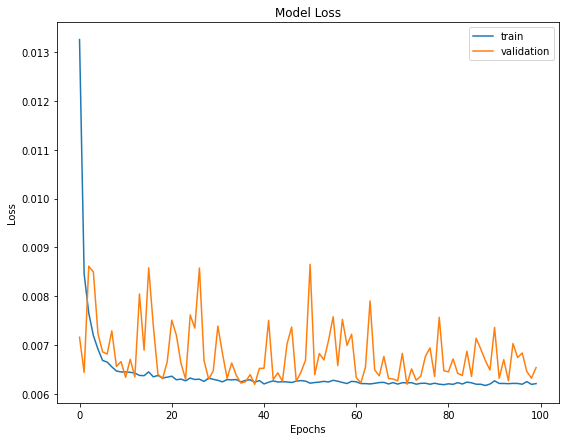

In [92]:
# Plot LOSS for train/test sets
plt.figure(figsize=(9,7))
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend(['train', 'validation'], loc='upper right')

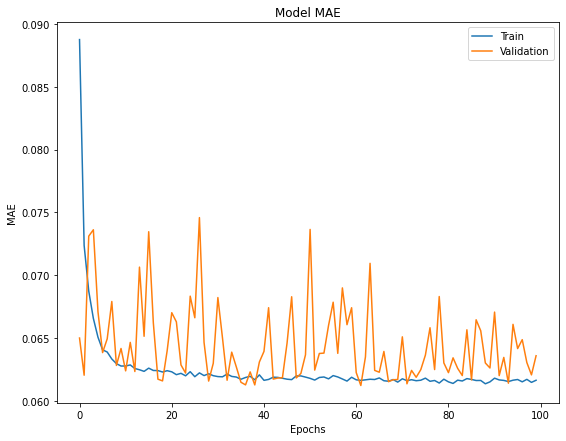

In [93]:
# Plot MAE for train/test sets
plt.figure(figsize=(9,7))
plt.plot(H.history['mean_absolute_error'])
plt.plot(H.history['val_mean_absolute_error'])
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.title('Model MAE')
plt.legend(['Train', 'Validation'], loc='upper right')


In [94]:
# Accuracy (MAE) on the test data
accuracy = model.evaluate(Xtest, Ytest)
print("TEST MAE: ", accuracy[1])

# check same for predictions using test dataset
Ypred = model.predict(Xtest)    # (1)
results = np.c_[Ypred, Ytest, abs(Ypred - Ytest)]
MAE = np.mean(results[:,2])
print(MAE)

158/158 [==============================] - 0s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0615 - mean_squared_error: 0.0062
TEST MAE:  0.06149234622716904
0.061492350351149604


In [95]:
# must invert normalized for actual results
Ypred_inv = scaler_y.inverse_transform(Ypred)  # from (1) above
Ytest_inv = scaler_y.inverse_transform(Ytest)
inverted = np.c_[Ypred_inv, Ytest_inv, abs(Ypred_inv - Ytest_inv)]
print(inverted)
# MAE from predictions (Note: try to get within 8 to 12 points during training)
MAE = np.mean(inverted[:,2])
print(MAE)

[[  8.50528622   8.           0.50528622]
 [  2.69598365  11.           8.30401635]
 [ -0.95525599   3.           3.95525599]
 ...
 [  8.33202839  18.           9.66797161]
 [ -4.09536695   7.          11.09536695]
 [-14.08691883 -18.           3.91308117]]
8.116990248173002


Text(0, 0.5, 'Predicted')

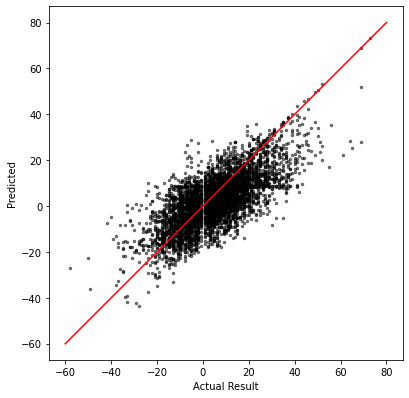

In [100]:
# plot predictions vs. actual
fig, ax = plt.subplots(figsize=(6.5,6.5))
ax.set_aspect(1)
plt.scatter(Ytest_inv, Ypred_inv, s=6, color='k', alpha=0.5)
plt.plot([-60,80], [-60,80], 'r', lw=1.5)
plt.xlabel("Actual Result")
plt.ylabel("Predicted")